In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !ln -s /content/gdrive/My Drive

In [ ]:
ls

3rdparty/               image_yolov4.sh        train.txt
backup/                 include/               uselib
bad.list                json_mjpeg_streams.sh  vcpkg.json
build/                  libdarknet.so          vcpkg.json.opencv23
build.ps1               LICENSE                video_yolov3.sh
cfg/                    Makefile               video_yolov4.sh
cmake/                  net_cam_v3.sh          yolov4.conv.137
CMakeLists.txt          net_cam_v4.sh          yolov4.weights
darknet*                obj/                   yolov4.weights.1
DarknetConfig.cmake.in  predictions.jpg        yolov4.weights.2
darknet_images.py       process.py             yolov4.weights.3
darknet.py              README.md              yolov4.weights.4
darknet_video.py        results/               yolov4.weights.5
data/                   scripts/               yolov4.weights.6
Drive@                  src/                   yolov4.weights.7
image_yolov3.sh         test.txt


In [ ]:
%cd /content/gdrive/MyDrive/yoloWaste

/content/gdrive/MyDrive/yoloWaste


In [ ]:
ls

bad.list  darknet/  Drive@  predictions.jpg  trainModel.ipynb


In [ ]:
# !git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd /content/gdrive/MyDrive/yoloWaste/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/MyDrive/yoloWaste/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
      |

In [ ]:
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
!chmod 777 /content/gdrive/MyDrive/yoloWaste/darknet/darknet

In [ ]:
%cd /content/gdrive/MyDrive/yoloWaste/darknet/data

/content/gdrive/MyDrive/yoloWaste/darknet/data


In [ ]:
# !python3 process.py

In [ ]:
ls

bad.list                 labels/          piford_names.txt  train.txt
chart.png                piford/          process.py        tst.jpg
chart_yolov4-custom.png  piford_data.txt  test.txt          yolov4.conv.137


In [ ]:
ls /content/gdrive/MyDrive/yoloWaste/darknet/data

bad.list                 labels/          piford_names.txt  train.txt
chart.png                piford/          process.py        tst.jpg
chart_yolov4-custom.png  piford_data.txt  test.txt          yolov4.conv.137


In [ ]:
cd /content/gdrive/MyDrive/yoloWaste/darknet/data

/content/gdrive/MyDrive/yoloWaste/darknet/data


In [ ]:
! /content/gdrive/MyDrive/yoloWaste/darknet/darknet detector train /content/gdrive/MyDrive/yoloWaste/darknet/data/piford_data.txt /content/gdrive/MyDrive/yoloWaste/darknet/cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yoloWaste/darknet/data/yolov4.conv.137 -dont_show -map

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn

In [ ]:
# import cv2
# image = cv2.imread('/content/gdrive/MyDrive/yoloWaste/darknet/data/piford/AluCan1,000.jpg')
# dimensions = image.shape
# print(dimensions)

(683, 512, 3)


In [ ]:
ls

labels/  piford_data.txt   process.py  train.txt
piford/  piford_names.txt  test.txt    yolov4.conv.137


In [ ]:
imShow('chart.png')

AttributeError: ignored

In [ ]:
# imShow('predictions.jpg')

In [ ]:
cd /content/gdrive/MyDrive/yoloWaste/darknet

/content/gdrive/MyDrive/yoloWaste/darknet


In [ ]:
ls /content/gdrive/MyDrive/yoloWaste/darknet/data

bad.list                 piford/           test.txt   yolov4.conv.137
chart.png                piford_data.txt   train.txt
chart_yolov4-custom.png  piford_names.txt  tst2.jpg
labels/                  process.py        tst.jpg


In [ ]:
! /content/gdrive/MyDrive/yoloWaste/darknet/darknet detector test /content/gdrive/MyDrive/yoloWaste/darknet/data/piford_data.txt /content/gdrive/MyDrive/yoloWaste/darknet/cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yoloWaste/darknet/backup/yolov4-custom_best.weights /content/gdrive/MyDrive/yoloWaste/darknet/data/tst2.jpg -thresh 0.5 -dont_show -map

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

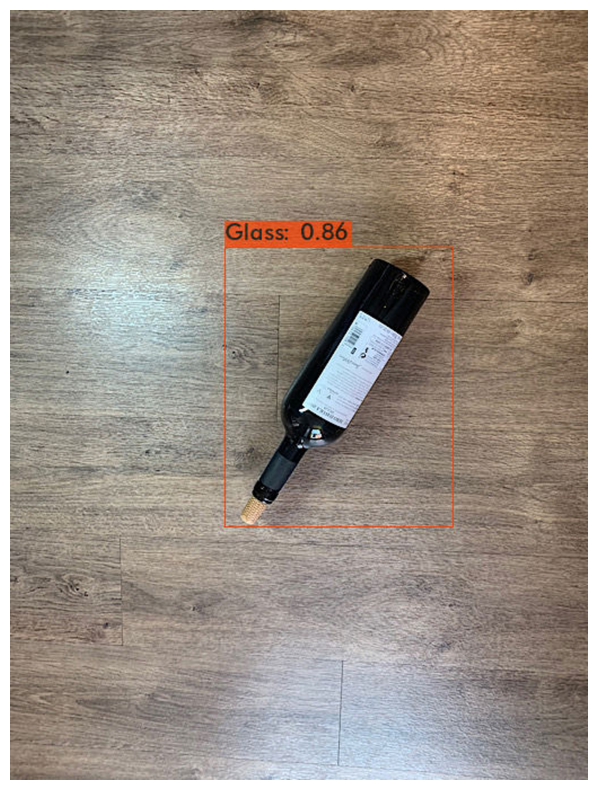

In [ ]:
imShow('predictions.jpg')

In [ ]:
pwd

'/content/gdrive/MyDrive/yoloWaste/darknet'